## Assignment 1.3C

### Bevan Fairleigh

Deakin University 219296864


GitHub [link](https://github.com/bevanyeah/assignments/)!

Welcome to your assignment this week! 


# Classification task

In this task you are asked to build a simple Feed Forward Neural Network, train it and test it!


**After this assignment you will be able to:**

- Load a dataset.
- Train a Feed Forward Neural Network.
- Test a Feed Forward Neural Network.

Let's get started! Run the following cell to install all the packages you will need.

In [3]:
#!pip install numpy
#!pip install keras
#!pip install tensorflow
#!pip install pandas
#!pip install matplotlib

Run the following cell to load the packages you will need.

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


The dataset we will use consists of 4500 examples with 512 features. A label is given for each example to indicate positive and negative instances.

Let's read the data.

In [5]:
df = pd.read_csv('data.csv')
df.set_index('id', inplace=True)

Now, let's split the data into training and test sets.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    df.index.values,
    df.label.values,
    test_size=0.15,
    random_state=17,
    stratify=df.label.values
)
df['data_type'] = ['note_set']*df.shape[0]
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_test, 'data_type'] = 'test'

## The data to use:

X_train = df[df['data_type']=='train'].iloc[:,:512].values
X_test = df[df['data_type']=='test'].iloc[:,:512].values
y_train = df[df['data_type']=='train'].iloc[:,512:513].values
y_test = df[df['data_type']=='test'].iloc[:,512:513].values

# Task 1

Build a Feed Forward Neural Network to address this classification task using the Keras framework.

In [36]:
#Create Classification Model : Feed Forward Neural Network
#Input size: 512 (number of features)
#Ouput size: 1 (our classification)

model = Sequential()
model.add(Dense(500, input_dim=512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Training

Now, let's start our training.

In [37]:
history = model.fit(X_train, y_train, epochs=200, batch_size=64, verbose=0)

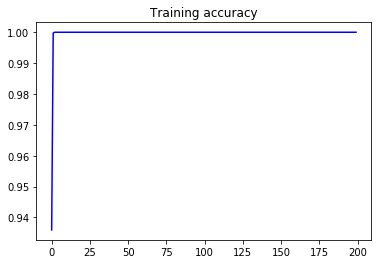

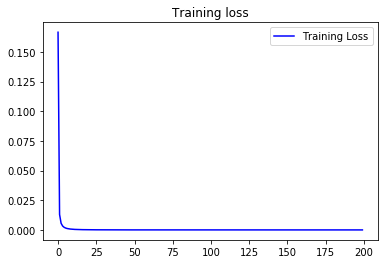

In [38]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

# Task 2

Test the model on the test set.

In [47]:
# Function: rmse
# Calculate root mean square between predications and true values
# In: two arrays of equal size
# Out: Single float
def rmse(y_pred, y_true):
    return np.sqrt(np.mean(np.square(y_pred - y_true)))


# Run predictions using the trained model on test data
predictions = model.predict_classes(X_test)

#Calculate error using rmse
error = rmse(predictions,y_test)

print(f"The Root Mean Square error (RMSE) of our model on the test data is {error:.4f}.")


The Root Mean Square error (RMSE) of our model on the test data is 0.0385.


# Congratulations!

You've come to the end of this assignment, and you have built your first neural network. 

Congratulations on finishing this notebook! 

